HW1 Team 42:  
Enriquez Benavides, Santiago, ienrique@andrew.cmu.edu  
Savellano, Danielle Aira, dsavella@andrew.cmu.edu

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# a. Read the data into a DataFrame object, with License as the row label. 
dog_df = pd.read_csv('Allegheny_County_2024_Dog_Data.csv', index_col = 0)

# How many rows and columns are there in your DataFrame?
print(dog_df.shape)

dog_df

(34776, 8)


,Breed,Color,DogName,OwnerZip,Gender,Intact,Age,Weight
License,,,,,,,,
3647543,COCKAPOO,BROWN,CHARLEY,15236,Male,False,94,35
3647545,GER SHEPHERD,WHITE,ELLIE,15238,Female,False,67,76
3647546,MALTESE,WHITE,FURBY,15243,Male,False,44,4
3647547,MALTESE,WHITE,GIZMO,15243,Male,False,25,4
3647551,AM PIT BULL TERRIER,BLACK,JED WAYNE,15229,Male,False,18,65
...,...,...,...,...,...,...,...,...
3714315,BEAGLE,WHITE/BLACK,ABBY,15025,Female,True,70,22
3714316,AM PIT BULL TERRIER,OTHER,LUCKY,15145,Male,True,42,68
3714318,SHIH TZU,CREAM,THEODORE BAYER,15143,Male,True,5,4


b.	Create a table, a horizontal bar chart, and a pie chart showing how many Male and Female dogs there are. Provide good titles and labels in your charts.

   Gender  Count
0    Male  17942
1  Female  16834


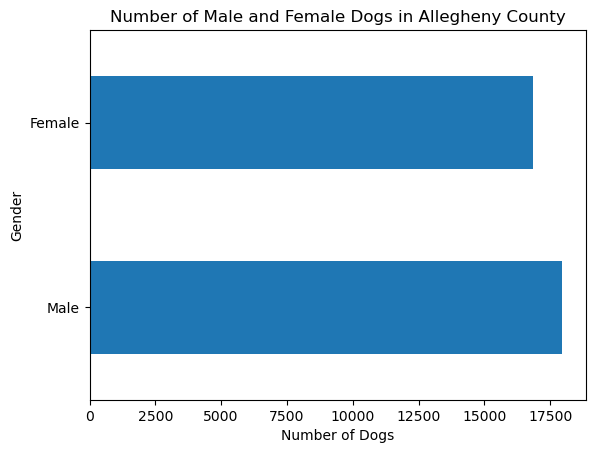

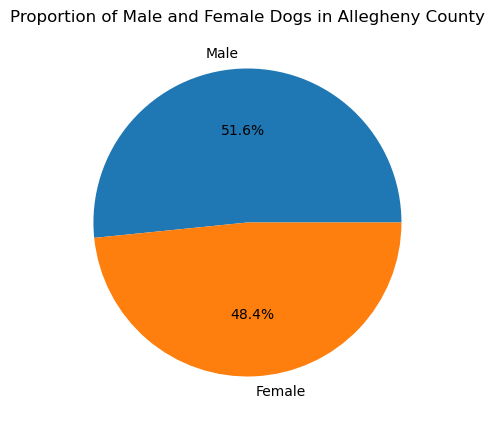

In [3]:
gender_counts = dog_df['Gender'].value_counts()

# Table
gender_table = pd.DataFrame({
    'Gender': gender_counts.index,
    'Count': gender_counts.values
})

print(gender_table)

# Bar Chart
bar = gender_counts.plot(kind='barh', title='Number of Male and Female Dogs in Allegheny County')
bar.set_xlabel('Number of Dogs')
plt.show()

# Pie Chart
pie = gender_counts.plot.pie(
    ylabel = '',
    figsize=(5, 5),
    autopct='%1.1f%%',
    title='Proportion of Male and Female Dogs in Allegheny County'
    )
plt.show()

c.	Create a table, a horizontal bar chart, and a pie chart showing how many dogs there are in the 6 ZIPcodes that have the most dogs.  Provide good titles and labels in your charts.

OwnerZip
15108    1510
15237    1465
15044    1365
15102    1225
15235    1059
15146    1057
Name: count, dtype: int64


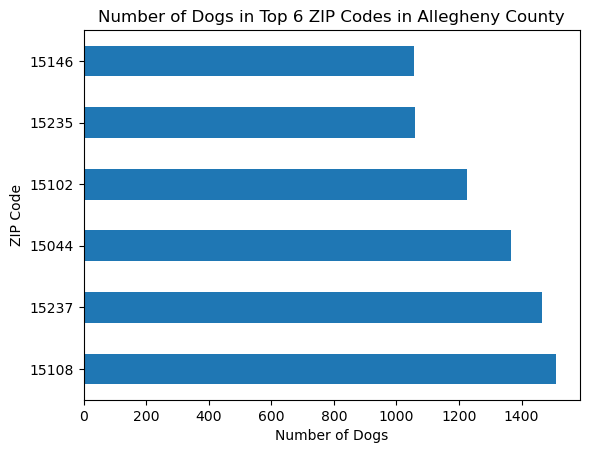

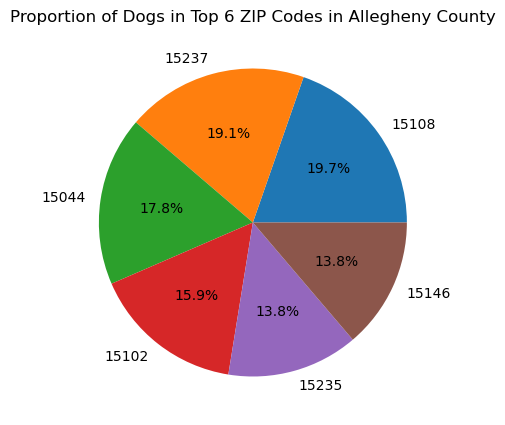

In [5]:
# Table
top6_zipcodes_df = dog_df['OwnerZip'].value_counts().head(6)
top6_zipcodes_df.columns = ['OwnerZip', 'Dog Count']
print(top6_zipcodes_df)

# Bar Chart
bar = top6_zipcodes_df.plot(kind='barh', title='Number of Dogs in Top 6 ZIP Codes in Allegheny County')
bar.set_xlabel('Number of Dogs')
bar.set_ylabel('ZIP Code')
plt.show()

# Pie Chart
pie = top6_zipcodes_df.plot.pie(
    ylabel = '',
    figsize=(5, 5),
    autopct='%1.1f%%',
    title='Proportion of Dogs in Top 6 ZIP Codes in Allegheny County'
    )
plt.show()

d.	Create a table, a horizontal bar chart, and a pie chart showing the number of adult dogs (12 months or older) that are intact Males, intact Females, neutered Males, and spayed Females.  Provide good titles and labels in your charts

            Category  Dog Count
0  Sterilized Female       9602
1    Sterilized Male       8945
2        Intact Male       7779
3      Intact Female       6079


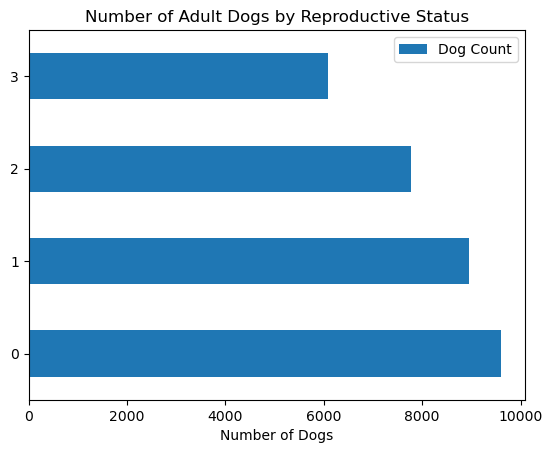

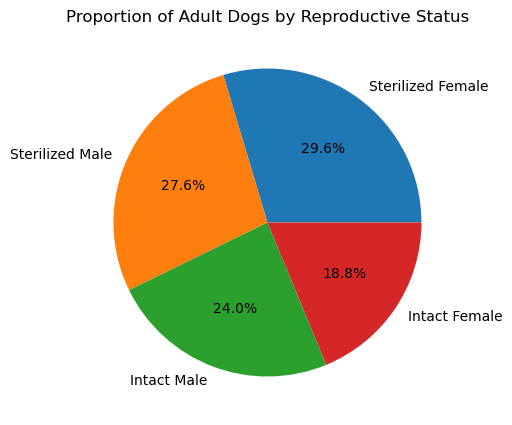

In [28]:
adult_dogs = dog_df[dog_df['Age'] >= 12].copy()  # Adding .copy() to explicitly create a copy

# Create categories based on Gender and Intact status
adult_dogs.loc[:, 'Category'] = adult_dogs.apply(lambda row: f"{'Intact' if row['Intact'] else 'Sterilized'} {row['Gender']}", axis=1)

# Table
category_counts = adult_dogs['Category'].value_counts()
category_counts_df = category_counts.reset_index()
category_counts_df.columns = ['Category', 'Dog Count']
print(category_counts_df)

# Bar Chart
bar = category_counts_df.plot(kind='barh', title='Number of Adult Dogs by Reproductive Status')
bar.set_xlabel('Number of Dogs')
plt.show()

# Pie Chart
pie = category_counts.plot.pie(
    ylabel='',
    figsize=(5, 5),
    title='Proportion of Adult Dogs by Reproductive Status',
    autopct='%1.1f%%'
)
plt.show()

e.	By examining the average weights of fully adult dogs (18 months or older), add a new column to your DataFrame named Category, with values Toy, Small, Medium, Large, and Giant.

In [30]:
fully_adult_dogs = dog_df[dog_df['Age'] >= 18].copy()
fully_adult_dogs['AverageWeight'] = fully_adult_dogs.groupby('Breed')['Weight'].transform('mean')

def categorize_weight(weight):
    if weight <= 6:
        return 'Toy'
    elif weight <= 20:
        return 'Small'
    elif weight <= 45:
        return 'Medium'
    elif weight <= 90:
        return 'Large'
    else:
        return 'Giant'

# Apply the categorize_weight function to create a 'Category' column based on breed average
fully_adult_dogs['Category'] = fully_adult_dogs['AverageWeight'].apply(categorize_weight)

# Calculate value counts based on the 'Category' column
category_counts = fully_adult_dogs['Category'].value_counts()
category_counts_df = category_counts.reset_index()
category_counts_df.columns = ['Category', 'Dog Count']

# Print the results
print("Table of Fully Adult Dog Counts by Category:")
print(category_counts_df)

# Save the DataFrame to a CSV file
fully_adult_dogs.to_csv('Dogs_with_Category.csv', index=False)
        

Table of Fully Adult Dog Counts by Category:
  Category  Dog Count
0    Large      15813
1    Small       6483
2   Medium       4576
3      Toy       2847
4    Giant       1384


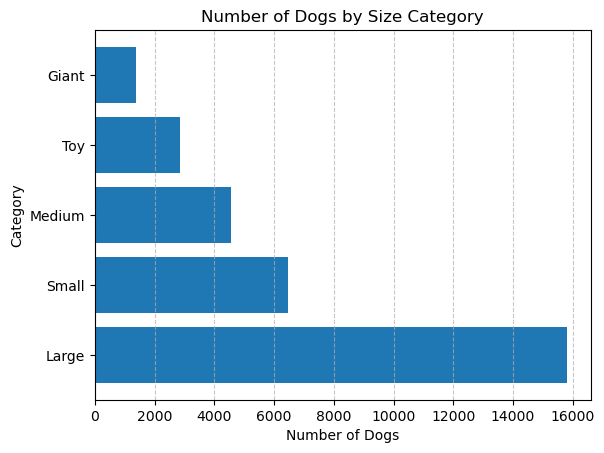

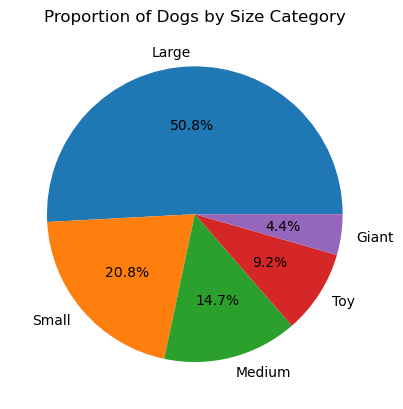

In [40]:
plt.barh(category_counts_df['Category'], category_counts_df['Dog Count'])
plt.title('Number of Dogs by Size Category')
plt.xlabel('Number of Dogs')
plt.ylabel('Category')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

plt.pie(
    category_counts_df['Dog Count'],
    labels=category_counts_df['Category'],
    autopct='%1.1f%%'
    )
plt.title('Proportion of Dogs by Size Category')
plt.show()


f.	What is the most popular breed among each of the breed categories, Toy, Small, Medium, Large, and Giant?  What are the lightest and the heaviest breeds?

In [48]:
# Group by 'Category' and 'Breed' to count occurrences
breed_counts = fully_adult_dogs.groupby(['Category', 'Breed']).size().reset_index(name='Count')

# Find the most popular breed in each category
most_popular_breeds = breed_counts.loc[breed_counts.groupby('Category')['Count'].idxmax()]

# Find the lightest and heaviest breeds
lightest_breed = fully_adult_dogs.loc[fully_adult_dogs['AverageWeight'].idxmin(), ['Breed', 'AverageWeight']]
heaviest_breed = fully_adult_dogs.loc[fully_adult_dogs['AverageWeight'].idxmax(), ['Breed', 'AverageWeight']]

# Display the results
print("Most Popular Breeds by Category:")
print(most_popular_breeds)

print("\nLightest Breed:")
print(lightest_breed)

print("\nHeaviest Breed:")
print(heaviest_breed)

Most Popular Breeds by Category:
   Category               Breed  Count
4     Giant          ROTTWEILER    406
19    Large  LABRADOR RETRIEVER   3263
23   Medium              BEAGLE   1167
42    Small            SHIH TZU   1241
45      Toy           CHIHUAHUA   1517

Lightest Breed:
Breed            POODLE TOY
AverageWeight      3.995475
Name: 3647611, dtype: object

Heaviest Breed:
Breed            GREAT DANE
AverageWeight    152.863057
Name: 3647659, dtype: object


g. Produce descriptive statistics, including mean and standard deviation, boxplots, and histograms for all dog ages.  Do the same for all dog weights.  Does this make any sense?  Make a comment in your Jupyter notebook.

Descriptive Statistics for Dog Ages:
count    31103.000000
mean        89.566569
std         43.614789
min         18.000000
25%         53.000000
50%         88.000000
75%        124.000000
max        192.000000
Name: Age, dtype: float64

Descriptive Statistics for Dog Weights:
count    31103.000000
mean        46.853455
std         32.243023
min          2.000000
25%         15.000000
50%         53.000000
75%         70.000000
max        202.000000
Name: Weight, dtype: float64


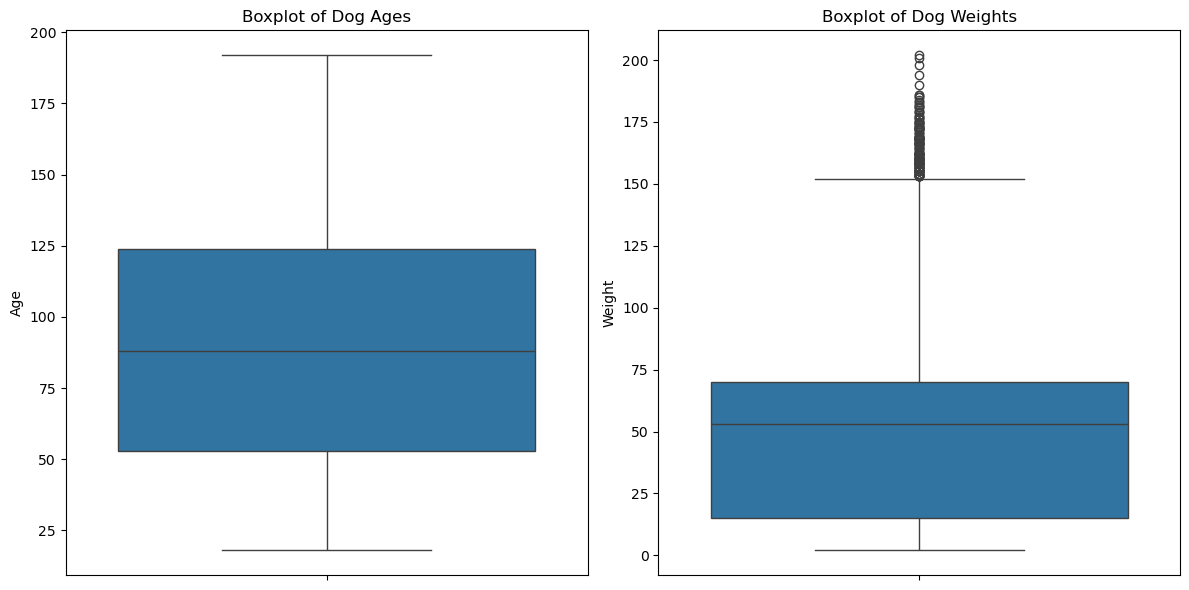

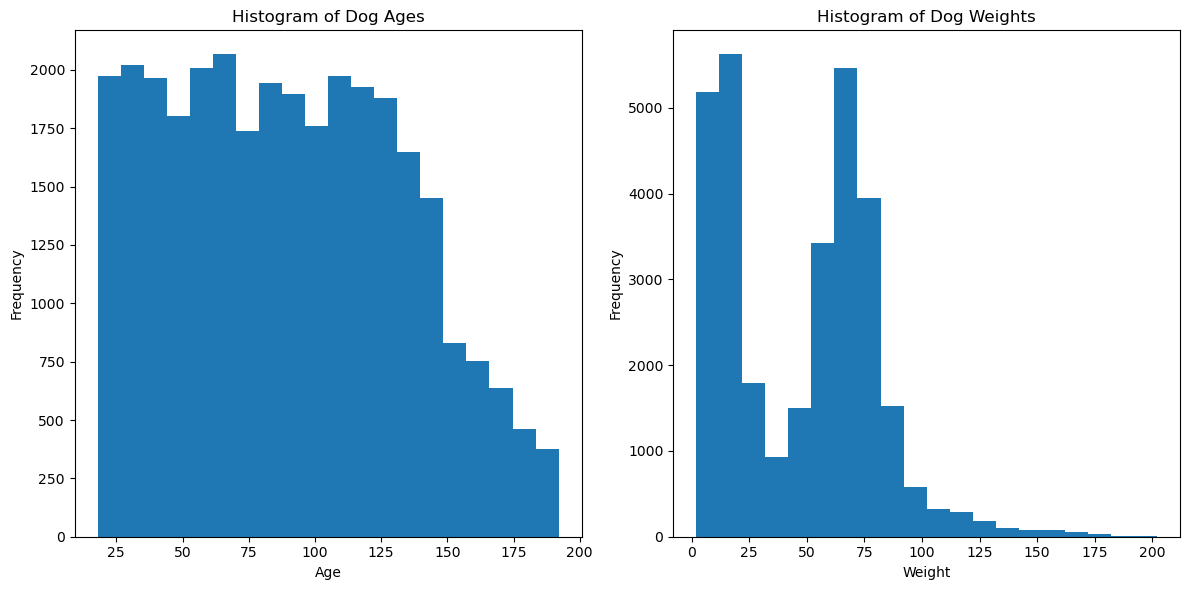

In [44]:
# Step 1: Descriptive statistics for age and weight
age_stats = fully_adult_dogs['Age'].describe()
weight_stats = fully_adult_dogs['Weight'].describe()

print("Descriptive Statistics for Dog Ages:")
print(age_stats)

print("\nDescriptive Statistics for Dog Weights:")
print(weight_stats)

# Step 2: Boxplots for age and weight
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=fully_adult_dogs['Age'])
plt.title('Boxplot of Dog Ages')
plt.ylabel('Age')

plt.subplot(1, 2, 2)
sns.boxplot(y=fully_adult_dogs['Weight'])
plt.title('Boxplot of Dog Weights')
plt.ylabel('Weight')

plt.tight_layout()
plt.show()

# Step 3: Histograms for age and weight
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(fully_adult_dogs['Age'], bins=20)
plt.title('Histogram of Dog Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(fully_adult_dogs['Weight'], bins=20)
plt.title('Histogram of Dog Weights')
plt.xlabel('Weight')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
# h. For each of the five most popular dog breeds, produce descriptive statistics, including mean and standard deviation, boxplots, and histograms for all dog ages.  Comment.

In [ ]:
# Step 1: Identify the five most popular breeds
top_breeds = most_popular_breeds['Breed'].head(5).tolist()

# Step 2: Create a new DataFrame for ages of the top breeds
top_breeds_data = fully_adult_dogs[fully_adult_dogs['Breed'].isin(top_breeds)]

# Step 3: Compute descriptive statistics for the ages of the top breeds
breed_age_stats = top_breeds_data.groupby('Breed')['Age'].describe()

print("Descriptive Statistics for Ages of the Five Most Popular Breeds:")
print(breed_age_stats)

# Step 4: Create boxplots for the ages of the top breeds
plt.figure(figsize=(12, 6))
sns.boxplot(x='Breed', y='Age', data=top_breeds_data)
plt.title('Boxplot of Ages for the Five Most Popular Breeds')
plt.xlabel('Breed')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

# Step 5: Create histograms for the ages of the top breeds
plt.figure(figsize=(12, 6))

for breed in top_breeds:
    plt.hist(top_breeds_data[top_breeds_data['Breed'] == breed]['Age'], 
             bins=10, alpha=0.5, label=breed)

plt.title('Histogram of Ages for the Five Most Popular Breeds')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
# i. For each of the Giant breeds, produce descriptive statistics, including mean and standard deviation, boxplots, and histograms for all adult (12 months or older) dog weights.  Comment.

In [ ]:
# Step 1: Filter for Giant breeds
giant_breeds = fully_adult_dogs[fully_adult_dogs['Category'] == 'Giant']

# Step 2: Filter for adult dogs (12 months or older)
adult_giant_dogs = giant_breeds[giant_breeds['Age'] >= 12]

# Step 3: Compute descriptive statistics for the weights of adult Giant breeds
weight_stats_giant = adult_giant_dogs['Weight'].describe()

print("Descriptive Statistics for Weights of Adult Giant Breeds:")
print(weight_stats_giant)

# Step 4: Create boxplots for the weights of adult Giant breeds
plt.figure(figsize=(8, 6))
sns.boxplot(y=adult_giant_dogs['Weight'])
plt.title('Boxplot of Weights for Adult Giant Breeds')
plt.ylabel('Weight')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Step 5: Create histogram for the weights of adult Giant breeds
plt.figure(figsize=(8, 6))
plt.hist(adult_giant_dogs['Weight'], bins=10, color='lightblue', edgecolor='black')
plt.title('Histogram of Weights for Adult Giant Breeds')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# j.Produce scatter plots of age vs. weight for five dog breeds of your choice.

In [ ]:
# Step 1: Select five dog breeds of your choice
selected_breeds = ['DACHSHUND', 'CHIHUAHUA', 'LABRADOR RETRIEVER', 'ROTTWEILER', 'SHIH TZU']  # Example breeds

# Step 2: Filter the data for the selected breeds
selected_breeds_data = fully_adult_dogs[fully_adult_dogs['Breed'].isin(selected_breeds)]

# Step 3: Create scatter plots for each breed
plt.figure(figsize=(12, 8))

for breed in selected_breeds:
    breed_data = selected_breeds_data[selected_breeds_data['Breed'] == breed]
    plt.scatter(breed_data['Age'], breed_data['Weight'], label=breed, alpha=0.6)

plt.title('Scatter Plot of Age vs. Weight for Selected Dog Breeds')
plt.xlabel('Age (months)')
plt.ylabel('Weight (lbs)')
plt.legend()
plt.grid(True)
plt.show()